In [1]:
import pandas as pd
import os
fp = "cal_housing.csv"
os.chdir("/home/admin123/feature_learning")
df = pd.read_csv(fp)
mhv = df['medianHouseValue']
req_cols = df.columns.tolist()
req_cols.remove('medianHouseValue')
df = df[req_cols]

In [2]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=8, whiten = True)
X = df.values
Xt = pca.fit_transform(X)


In [3]:
 print(pca.explained_variance_ratio_) 

[9.50117122e-01 4.47191225e-02 4.71195953e-03 4.28681049e-04
 2.14358246e-05 1.26637984e-06 3.73905445e-07 3.88697800e-08]


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
#loadings = pca.components_ * np.sqrt(pca.explained_variance_)
df_comp = pd.DataFrame(pca.components_[:, :2].T)
df_comp.columns = df.columns

In [6]:
df_comp

,lat,long,housingMedAge,totalRooms,totalBedrooms,population,households,medianIncome
0,0.000047,0.000425,0.000101,0.004548,-0.016484,-0.674713,-0.154604,0.721503
1,-0.000046,-0.000587,0.000172,-0.001338,0.000668,0.732857,-0.025435,0.679905


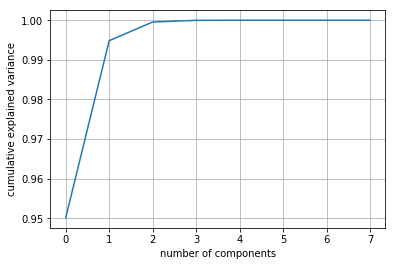

In [7]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

(array([6.000e+00, 1.700e+02, 2.017e+04, 2.810e+02, 9.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-12.71709435,  -7.51193009,  -2.30676584,   2.89839842,
          8.10356268,  13.30872693,  18.51389119,  23.71905544,
         28.9242197 ,  34.12938396,  39.33454821]),
 <a list of 10 Patch objects>)

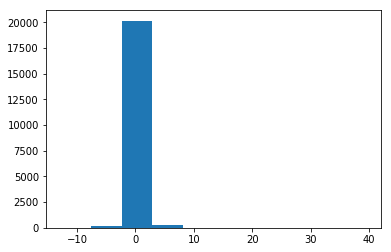

In [8]:
plt.hist(Xt[:, 1])

In [11]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng, contamination=0.005)
clf.fit(Xt[:, :2])

IsolationForest(bootstrap=False, contamination=0.005, max_features=1.0,
        max_samples=100, n_estimators=100, n_jobs=1,
        random_state=<mtrand.RandomState object at 0x7f9fd9a7f0a0>,
        verbose=0)

In [12]:
ypred = clf.predict(Xt[:, :2])

In [13]:
tagged_df = pd.DataFrame(Xt[:, :2])

In [14]:
tagged_df["Tag"] = ypred

In [16]:
tagged_df.iloc[1, 0]

-0.6192612332312664

In [19]:
oldf = tagged_df.query("Tag == -1")

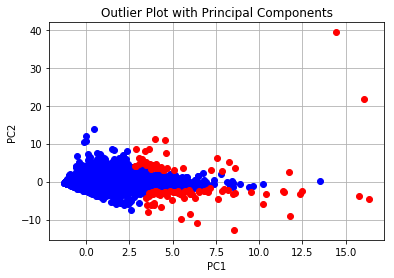

In [28]:
regulardf = tagged_df.query("Tag == 1")
plt.plot(regulardf.iloc[:, 0], regulardf.iloc[:, 1], 'bo', color = "blue")
plt.plot(oldf.iloc[:, 0], oldf.iloc[:, 1], 'bo', color = "red")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Outlier Plot with Principal Components")
plt.grid()
plt.show()